<a href="https://colab.research.google.com/github/PrinceArya/Project-Report-on-Customer-Churn-Prediction/blob/master/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/telco-customer-churn.zip

Archive:  /content/telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


##LOADING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv") ##Reading data

In [ ]:
data.head(5)        ##first 5 rows of dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape  ##shape of dataset

(7043, 21)

comment: Dataset contains 7043 unique customer id with 20 attributes.

In [ ]:
data.dtypes          ##attribute's datatype

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

It is interesting to see that the TotalCharges columns is object datatype but actually it should be float datatype.

In [ ]:
data.isnull().mean()             ##Checking null values in every column of dataset

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

It seems that there is no any null values in dataset but wait....

In [ ]:
(data["TotalCharges"]==" ").sum()

11

*TotalCharges* columns contains some blank values.

Assumptions:
1. It may be the case that customer have not paid any total amount or charges may be waived out by the company.
2. These gap may be left accidently.

for now we will assume first case and fill those blank gap with 0.

In [ ]:
data['TotalCharges'] = data["TotalCharges"].replace(" ",0)

In [ ]:
(data['TotalCharges']==" ").sum()       ##just confirming

0

In [ ]:
data["TotalCharges"] = data["TotalCharges"].astype(float)      ##Changing the datatype into float

In [ ]:
data.describe()            ##Statical description of numerical feature

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


It may be the case that these variables contains some outliers. For checking out those outlier we will plot BOX_PLOT.

##UNIVARIATE ANALYSIS

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Box(y=data["MonthlyCharges"], name= "MonthlyCharges"))
fig.add_trace(go.Box(y=data["TotalCharges"]/100, name="TotalCharges"))  ##scaling is done to make its value comparable to monthly charges and tenure
fig.add_trace(go.Box(y=data["tenure"], name="Tenure"))

fig.show()




* from all the plot we can conclude that columns: TotalCharges, Montlycharges and tenure do not contains any outliers





In [ ]:
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns
color = sns.color_palette()

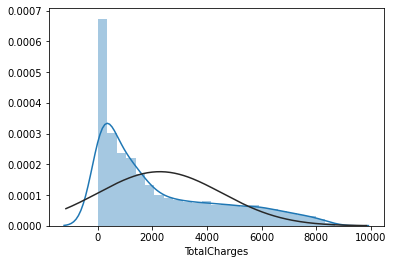

In [ ]:
sns.distplot(data['TotalCharges'] ,fit=norm);

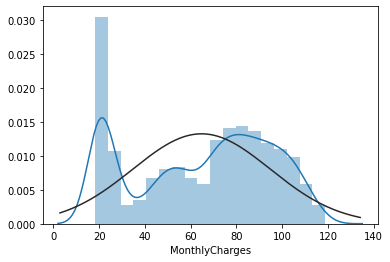

In [ ]:
sns.distplot(data['MonthlyCharges'] ,fit=norm);

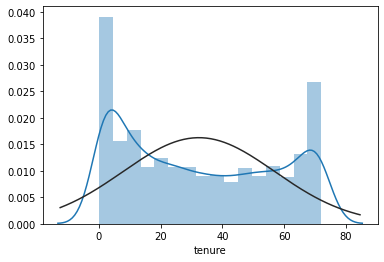

In [ ]:
sns.distplot(data['tenure'] ,fit=norm);

From the above plot we can conclude that 

* Skewness of distribution of TotalCharges, MonthlyCharges and tenure are right skewed .

* Kurtosis of distribution of TotalCharges, MonthlyCharges and tenure are of Leptokurtic in nature.




In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')


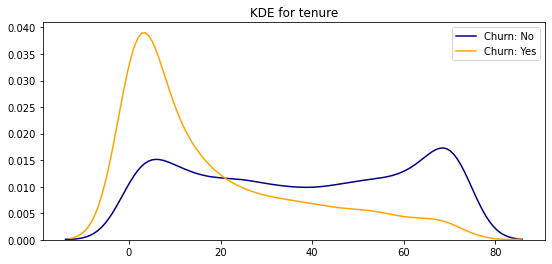

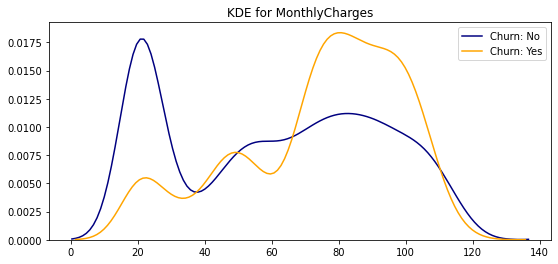

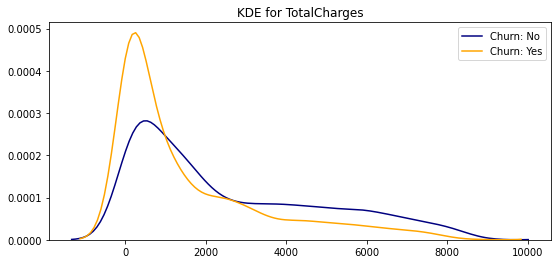

In [ ]:
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

Plotting above feature's distribution on dividing them on the basis of churn category and not churn category we conclude that:

1. Customers with small tenure are more likely to churn
2. Customers having low monthly charge is less likely to churn
3. Customers having high TotalCharges are more likely to churn.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6154f25518>,
      dtype=object)

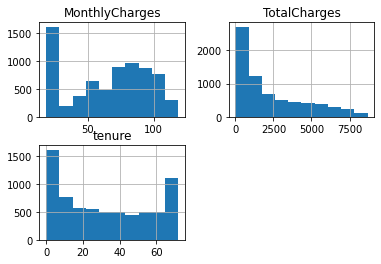

In [ ]:
data[["MonthlyCharges", "TotalCharges", "tenure"]].hist()

Conclusion

1. Customers with low TotalCharges, MonthlyCharges and Tenure are in majority.

2. Count of customer decrease approximately exponentially 
as Total Charges increases. 

3. Count of customers with intermediate tenure is almost constant.

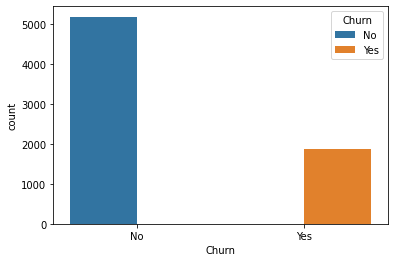

In [ ]:
sns.countplot(x="Churn", hue="Churn", data=data)

In [ ]:
data["Churn"].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

#BIVARIATE ANALYSIS

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
churn = data[data["Churn"] == "Yes"]
not_churn = data[data["Churn"] == "No"]

In [ ]:
def pie_plot(columns):
  lab2 =not_churn[columns].value_counts().keys().tolist()
  val2 = not_churn[columns].value_counts().values.tolist()
  lab1 =churn[columns].value_counts().keys().tolist()
  val1 =churn[columns].value_counts().values.tolist()
  fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
  fig.add_trace(go.Pie(labels=lab1, values=val1, name="Churn"),
              1, 1)
  fig.add_trace(go.Pie(labels=lab2, values=val2, name="Not churn"),
              1, 2)

  # Use `hole` to create a donut-like pie chart
  fig.update_traces(hole=.4, hoverinfo="label+percent+name")

  fig.update_layout(
    title_text=str(columns)+" vs churn",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Not churn', x=0.85, y=0.5, font_size=20, showarrow=False)])
  fig.show()


In [ ]:
cat_features = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]

In [ ]:
for x in cat_features:
  pie_plot(x)

#Categorical feature encoding

In [ ]:
cat_features = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
encoded = data[cat_features].apply(encoder.fit_transform)

In [ ]:
encoded.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
data = data.drop(columns=cat_features)

In [ ]:
data = pd.concat([data,encoded],axis=1)

In [ ]:
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
data = data.drop(columns=["customerID"])

In [ ]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
col_name=[]
corr=[]
for col in data.columns:
  if(col!="Churn"):
    col_name.append(col)
    corr.append(data[col].corr(data["Churn"]))

In [ ]:
correlation = pd.DataFrame()
correlation["Attributes"]=col_name
correlation["Correlation_with_target_feature"]=corr

In [ ]:
correlation.head(25)

,Attributes,Correlation_with_target_feature
0,SeniorCitizen,0.150889
1,tenure,-0.352229
2,MonthlyCharges,0.193356
3,TotalCharges,-0.198324
4,gender,-0.008612
5,Partner,-0.150448
6,Dependents,-0.164221
7,PhoneService,0.011942
8,MultipleLines,0.038037
9,InternetService,-0.047291


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=corr,
            y=col_name,
            orientation='h'))

fig.show()

#MULTIVARIATE ANALYSIS

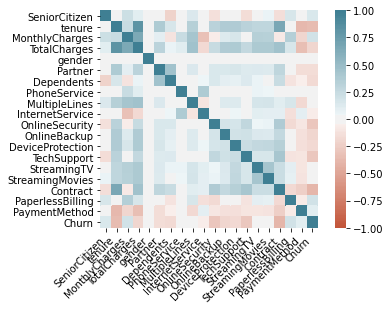

In [ ]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#MODEL SELECTION

In [ ]:
y = data.pop("Churn")

In [ ]:
X =  data

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42, stratify = y)

In [ ]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5557,0,5,80.20,384.25,0,0,0,1,0,1,0,0,0,0,2,0,0,0,2
2270,1,3,86.85,220.95,0,0,0,1,0,1,0,0,2,0,2,0,0,1,2
6930,0,3,75.15,216.75,0,1,0,1,2,1,0,0,0,0,0,0,0,1,1
2257,0,60,80.55,4847.05,0,0,0,1,2,0,0,0,2,2,2,2,1,0,1
898,0,12,98.90,1120.95,0,0,0,1,0,1,2,0,0,2,2,2,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=data.columns)
X_test = pd.DataFrame(X_test, columns=data.columns)

#Decision Tree

In [ ]:
model1 = DecisionTreeClassifier()          #decision tree classifier
model1 = model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7231424514907714


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Thanks to https://www.kaggle.com/marcovasquez/basic-nlp-with-tensorflow-and-wordcloud
def plot_cm(y_true, y_pred, title):
    figsize=(6,6)
    y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap='viridis', annot=annot, fmt='', ax=ax)


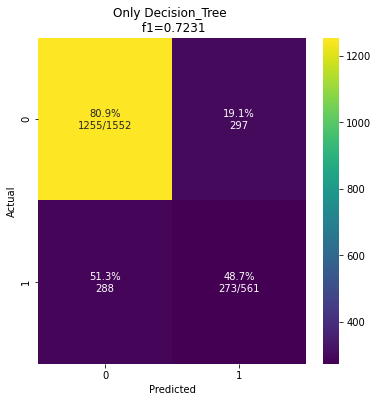

In [ ]:
plot_cm(y_test, y_pred, 'Only Decision_Tree \n f1=' + str('%.4f' %metrics.accuracy_score(y_test, y_pred)))

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.7231424514907714
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1552
           1       0.48      0.49      0.48       561

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.72      0.72      0.72      2113



we can see that precision and recall of class 1 is very low

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs=4)

In [ ]:
%%time
forest.fit(X_train, y_train)

CPU times: user 839 ms, sys: 42.2 ms, total: 882 ms
Wall time: 549 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [ ]:
pred2 = forest.predict(X_test)

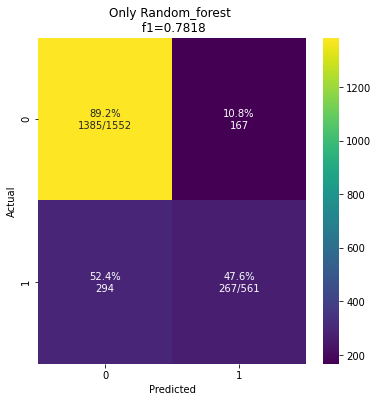

In [ ]:
plot_cm(y_test, pred2, 'Only Random_forest \n f1=' + str('%.4f' %accuracy_score(y_test, pred2)))

In [ ]:
print(accuracy_score(y_test, pred2))
print(classification_report(y_test,pred2))

0.7818267865593942
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1552
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



precision for class 1 improve.



#Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
logit = LogisticRegression(C=1, solver='lbfgs', max_iter=500,
                           random_state=17, n_jobs=4)


In [ ]:
%%time
logit.fit(X_train, y_train)

CPU times: user 33.1 ms, sys: 56.2 ms, total: 89.4 ms
Wall time: 1.29 s


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=4, penalty='l2', random_state=17,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
pred = logit.predict(X_test)

In [ ]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

0.8031235210601041
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.55      0.60       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



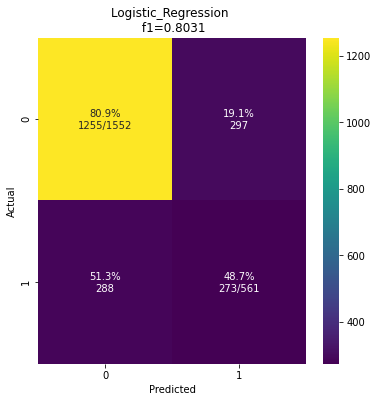

In [ ]:
plot_cm(y_test, y_pred, 'Logistic_Regression \n f1=' + str('%.4f' %accuracy_score(y_test, pred)))

Precision as well as Recall improves with logistic regression.

In [ ]:
##Lets try some advance model

#Light Gbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgb_clf = LGBMClassifier(random_state=17)

In [ ]:
%%time
lgb_clf.fit(X_train, y_train)

CPU times: user 283 ms, sys: 12.9 ms, total: 296 ms
Wall time: 161 ms


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=17, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
accuracy_score(y_test, lgb_clf.predict(X_test))

0.7860861334595362

Lets do hyperparameter tunning

stage 1 of hyperparameter tunning

In [ ]:
param_grid = {'num_leaves': [7, 15, 31, 63], 
              'max_depth': [3, 4, 5, 6, -1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_searcher = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, 
                             cv=5, verbose=1, n_jobs=4)

In [ ]:
grid_searcher.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   11.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=17, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=4,
             param_grid={'max_depth': [3, 4, 5, 6, -1],
                         'num_leaves': [7, 

In [ ]:
grid_searcher.best_params_, grid_searcher.best_score_

({'max_depth': 3, 'num_leaves': 15}, 0.8038539553752535)

In [ ]:
accuracy_score(y_test, grid_searcher.predict(X_test))

0.795551348793185

stage 2 of hyperparameter tunning

learning rate tunning

In [ ]:
num_iterations = 200
lgb_clf2 = LGBMClassifier(random_state=17, max_depth=3, 
                          num_leaves=15, n_estimators=num_iterations,
                          n_jobs=1)

param_grid2 = {'learning_rate': np.logspace(-3, 0, 10)}
grid_searcher2 = GridSearchCV(estimator=lgb_clf2, param_grid=param_grid2,
                               cv=5, verbose=1, n_jobs=4)
grid_searcher2.fit(X_train, y_train)
print(grid_searcher2.best_params_, grid_searcher2.best_score_)
print(accuracy_score(y_test, grid_searcher2.predict(X_test)))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.7s finished


{'learning_rate': 0.021544346900318832} 0.8032454361054766
0.7969711310932324


In [ ]:
final_lgb = LGBMClassifier(n_estimators=500, num_leaves=15,
                           learning_rate=0.02154, max_depth=3,
                         n_jobs=4)

In [ ]:
final_lgb.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.02154, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=4, num_leaves=15, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:

lgb_final_pred = final_lgb.predict(X_test)

In [ ]:
accuracy_score(y_test,lgb_final_pred)

0.79649787032655

In [ ]:
print(accuracy_score(y_test, lgb_final_pred))
print(classification_report(y_test,lgb_final_pred))

0.79649787032655
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.65      0.50      0.56       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



Precision of majority class have increased
but it is showing poor performance for minority class

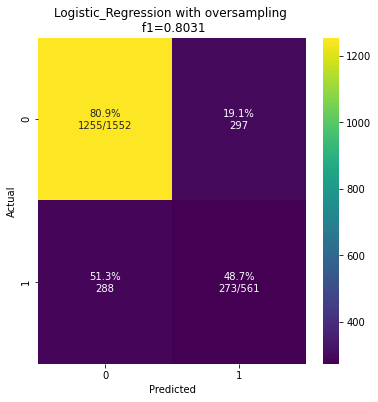

In [ ]:
plot_cm(y_test, y_pred, 'Logistic_Regression with oversampling \n f1=' + str('%.4f' %accuracy_score(y_test, pred)))

#Further Improvement

1. Feature engineering
2. Oversampling
3. Using class weight
4. Feature Selection

Since TotalCharges MonthlyCharges and tenure are some best feature we have, we can generate some new feature from it. but it does not improve accuracy so for now we are neglecting this one.

In [ ]:
#data["discount"] = (data["MonthlyCharges"]-(data["TotalCharges"]/(data["tenure"]+1)))##Let's name this feature discount

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(data.values, y, test_size=0.3, random_state=42, stratify = y)

Till now the best model we have is Logistic regression we will select it for further experiment


Now we will do upsampling to increase the amount of minority class data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)        ##Oversampling
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
distri = pd.DataFrame()
distri["Condition"] = ["Before_Oversampling","After_Oversampling"]

In [ ]:
distri["Count_of_Minority_class"] = [(y_train==1).sum(),(y_res==1).sum()]
distri["Count_of_Majority_class"] = [(y_train==0).sum(),(y_res==0).sum()]

In [ ]:
distri.head()

,Condition,Count_of_Minority_class,Count_of_Majority_class
0,Before_Oversampling,1308,3622
1,After_Oversampling,3622,3622


In [ ]:
%%time
logit.fit(X_res, y_res)

CPU times: user 5.68 ms, sys: 3.09 ms, total: 8.77 ms
Wall time: 114 ms


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=4, penalty='l2', random_state=17,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
pred = logit.predict(X_test)

In [ ]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

0.7406530998580217
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1552
           1       0.51      0.78      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.75      0.71      2113
weighted avg       0.80      0.74      0.75      2113



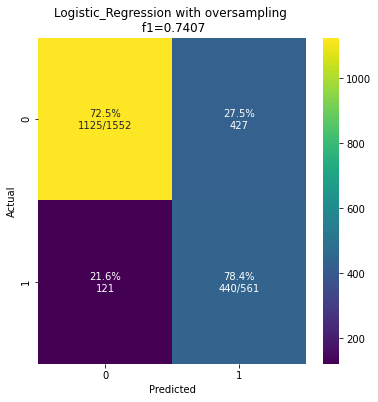

In [ ]:
plot_cm(y_test, pred, 'Logistic_Regression with oversampling \n f1=' + str('%.4f' %accuracy_score(y_test, pred)))

Although Recall of minority classes has improved a lot but overall accuracy reduced. Precision of Minority class is still low

Another approach we will apply class weight while prediction.
For this we will use light gbm model

#Applying_Class Weight

class_weight= [1.36112645 3.76911315]


Text(0.5, 1.0, 'class_weight')

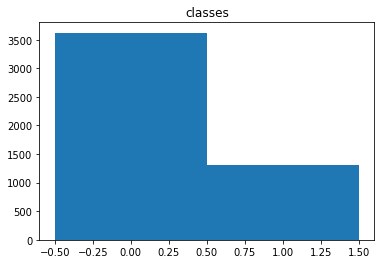

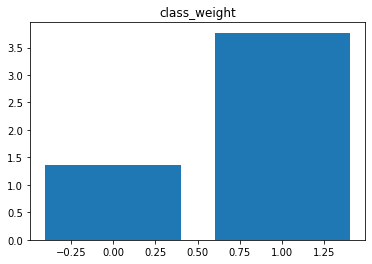

In [ ]:
def get_class_weight(classes, exp=1):
    '''
    Weight of the class is inversely proportional to the population of the class.
    There is an exponent for adding more weight.
    '''
    hist, _ = np.histogram(classes, bins=np.arange(3)-0.5)
    class_weight = hist.sum()/np.power(hist, exp)
    
    return class_weight

class_weight = get_class_weight(y_train)
print('class_weight=', class_weight)
plt.figure()
plt.title('classes')
plt.hist(y_train, bins=np.arange(3)-0.5)
plt.figure()
plt.title('class_weight')
plt.bar(np.arange(2), class_weight)
plt.title('class_weight')

In [ ]:
import lightgbm as lgb

In [ ]:
dataset = lgb.Dataset(X_train, label=y_train, weight=class_weight[y_train])
params = {'learning_rate': 0.1,
          'num_class': 1,
          'metric': 'logloss',
          'verbose': 1,
          'learning_rate':0.021}

In [ ]:
# fit the model
print('Training LGBM...')
gbc = lgb.train(params, dataset, 500, verbose_eval=10)
print('LGBM trained!')

Training LGBM...
LGBM trained!


In [ ]:
gbc_pred = gbc.predict(X_test)
print('gbc_pred.shape=', gbc_pred.shape)

gbc_pred.shape= (2113,)


In [ ]:
pred = np.round(gbc_pred)

In [ ]:
accuracy_score(pred,y_test)

0.7619498343587316

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1552
           1       0.54      0.73      0.62       561

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.76      0.77      2113



Precision of minority class improve a lot.

#Feature Selection

In [ ]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
logit = LogisticRegression(C=1, solver='lbfgs', max_iter=500,
                           random_state=17, n_jobs=4)

In [ ]:
acc=[]
maximum_acc=0
for x in range(1,20):
  sfs = SFS(logit,k_features=x,forward=True,floating=False,scoring = 'accuracy',cv = 0)
  sfs.fit(X_train, y_train)
  col_n = list((sfs.k_feature_names_))
  logit.fit(X_train[col_n],y_train)
  ac = accuracy_score(y_test,logit.predict(X_test[col_n]))
  if(ac>maximum_acc):
    maximum_acc=ac
    best_feature = col_n
  acc.append(ac)
  print("Accuracy after selection of",x,"best feature is: ",accuracy_score(y_test,logit.predict(X_test[col_n])))


Accuracy after selection of 1 best feature is:  0.73450070989115
Accuracy after selection of 2 best feature is:  0.7539044013251301
Accuracy after selection of 3 best feature is:  0.7927117841930904
Accuracy after selection of 4 best feature is:  0.795551348793185
Accuracy after selection of 5 best feature is:  0.8007572172266919
Accuracy after selection of 6 best feature is:  0.7946048272598202
Accuracy after selection of 7 best feature is:  0.79649787032655
Accuracy after selection of 8 best feature is:  0.79649787032655
Accuracy after selection of 9 best feature is:  0.808329389493611
Accuracy after selection of 10 best feature is:  0.804070042593469
Accuracy after selection of 11 best feature is:  0.8050165641268339
Accuracy after selection of 12 best feature is:  0.8031235210601041
Accuracy after selection of 13 best feature is:  0.8050165641268339
Accuracy after selection of 14 best feature is:  0.8012304779933743
Accuracy after selection of 15 best feature is:  0.803123521060104

In [ ]:
X = list(range(1,20))

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(x=X, y=acc))
fig.update_layout(title='Count of best features vs accuracy',
                   xaxis_title='Count of features',
                   yaxis_title='Accuracy')
fig.show()

In [ ]:
best_feature

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'PhoneService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaperlessBilling']

In [ ]:
logit.fit(X_train[best_feature],y_train)
ac = accuracy_score(y_test,logit.predict(X_test[best_feature]))

In [ ]:
print(ac)
print(classification_report(y_test,logit.predict(X_test[best_feature])))

0.808329389493611
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



Best till now....